<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except IOError:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [131]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Первое, что стоит отметить, это то, что разделить в csv-файле - знак табуляции.
Сам файл содержит 23699 объявлений о продаже квартир и соответственно такое же количество строк. Каждая строка содержит 22 столбца, которые характеризуют квартиры из объявлений.
Сразу заметно, что данные нуждаются в обработке. Есть много столбцов с пропусками, некоторые столбцы требуют изменения типа данных. Возможно есть какие-то другие проблемы с данными, исследуем это подробнее.

## Предобработка данных

### Изменение названий столбцов

Из `info()` видно, что стобцы `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` не соответствуют стилю `snake_case`.
Исправим это.

In [132]:
data = data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_30

### Обработка пропусков

Пропуски есть в следующих столбцах:<a id='omissions'></a>

In [133]:
for column in data.columns:
    is_null = data[column].isna().sum()
    if is_null:
        print(f"{column:<30}: {is_null}")

ceiling_height                : 9195
floors_total                  : 86
living_area                   : 1903
is_apartment                  : 20924
kitchen_area                  : 2278
balcony                       : 11519
locality_name                 : 49
airports_nearest              : 5542
city_centers_nearest          : 5519
parks_around_3000             : 5518
parks_nearest                 : 15620
ponds_around_3000             : 5518
ponds_nearest                 : 14589
days_exposition               : 3181


#### Название населенного пункта `locality_name`

Посмотрим распределение объявлений по населенным пунктам, отфильтровав их в порядке убывания.

In [134]:
locality_names = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False)
print(f'Всего населенных пунктов в объявлениях:', len(locality_names))
locality_names.head(10)


Всего населенных пунктов в объявлениях: 364


locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: last_price, dtype: int64

Примерно 2/3 объявлений из Санкт-Петербурга, будет логично предположить, что большинство пропущенных названий именно "Санкт-Петербург"
Примерное географическое положение можно выяснить из отдаленности до центра города и аэропорта.
Посмотрим на объявления из Санкт-Петербурга

In [135]:
data.loc[
    data['locality_name'] == 'Санкт-Петербург',
    ['airports_nearest', 'city_centers_nearest']
].describe()

,airports_nearest,city_centers_nearest
count,15636.000000,15660.000000
mean,28046.186237,11601.291571
std,11557.063820,4842.035279
min,0.000000,181.000000
25%,18584.250000,8327.000000
50%,26757.500000,12244.500000
75%,36614.000000,14943.000000
max,54784.000000,29493.000000


Мы можем допустить для простоты, что все объявления с пропущенными `locality_name` относятся к Санкт-Петербургу, если `airports_nearest`  и `city_centers_nearest` меньше максимальных для Петербурга.

In [136]:
data.loc[
    (data['locality_name'].isna()) &
    (data['airports_nearest'] < 54784) &
    (data['city_centers_nearest'] < 29493),
    ['locality_name']
] = 'Санкт-Петербург'

Посмотрим, что еще осталось

In [137]:
data.loc[
    data['locality_name'].isna(),
    ['airports_nearest', 'city_centers_nearest']
].sort_values(by='city_centers_nearest')

,airports_nearest,city_centers_nearest
8986,19659.0,31813.0
21119,19744.0,31897.0
21276,60195.0,41294.0
2033,NaN,NaN
14342,NaN,NaN
17535,NaN,NaN
20382,NaN,NaN
20590,NaN,NaN
21715,NaN,NaN
21898,NaN,NaN


Отлично, осталось всего 11. 8 строк из 11 не имеют никаких географических ориентиров. Поэтому заполним пропущенные значения в них отметкой "Неизвестно"



In [138]:
data.loc[
    (data['locality_name'].isna()) & (data['airports_nearest'].isna()),
    'locality_name'
] = 'Неизвестно'

In [140]:
data.loc[
    data['locality_name'].isna(),
    ['airports_nearest', 'city_centers_nearest']
]

,airports_nearest,city_centers_nearest
8986,19659.0,31813.0
21119,19744.0,31897.0
21276,60195.0,41294.0


Теперь найдем, есть ли объявления с похожими расстояниями для первых 2 строк, потому что они очевидно находятся рядом и потом для третьей строки

In [112]:
airport_nearest_filter = ((data['airports_nearest'] < 20000) &
                          (19500 < data['airports_nearest']))
city_centers_nearest_filter = ((31500 < data['city_centers_nearest']) &
                               (data['city_centers_nearest'] < 32000))
data.loc[
    airport_nearest_filter & city_centers_nearest_filter,
    ['locality_name', 'airports_nearest', 'city_centers_nearest', 'last_price', 'total_area']
].sort_values(by='total_area')


,locality_name,airports_nearest,city_centers_nearest,last_price,total_area
284,Павловск,19516.0,31670.0,2650000.0,30.5
2526,Пушкин,19571.0,31725.0,5200000.0,42.2
221,Павловск,19775.0,31929.0,3750000.0,43.0
21119,NaN,19744.0,31897.0,3500000.0,43.2
8986,NaN,19659.0,31813.0,4850000.0,103.1
8732,Павловск,19575.0,31729.0,9300000.0,151.5
17874,Пушкин,19760.0,31914.0,17000000.0,170.0


Географически подходят Павловск и Пушкин, но квартиры в Пушкине по стоимости значительно дороже, поэтому скорее всего объявления из Павловска.

In [147]:
data.loc[[21119, 8986], 'locality_name'] = 'Павловск'

In [148]:
airport_nearest_filter = ((data['airports_nearest'] < 62000) &
                          (59000 < data['airports_nearest']))
city_centers_nearest_filter = ((40000 < data['city_centers_nearest']) &
                               (data['city_centers_nearest'] < 44000))
data.loc[
    airport_nearest_filter & city_centers_nearest_filter,
    ['locality_name', 'airports_nearest', 'city_centers_nearest', 'last_price', 'total_area']
].sort_values(by='city_centers_nearest')

,locality_name,airports_nearest,city_centers_nearest,last_price,total_area
21276,посёлок Репино,60195.0,41294.0,17122148.0,178.3
5659,посёлок Репино,61451.0,42550.0,11067416.0,160.7
2454,посёлок Репино,61484.0,42583.0,28000000.0,160.0
17162,Сестрорецк,61664.0,42763.0,6100000.0,52.5
19984,Сестрорецк,61872.0,42971.0,7990000.0,62.2


In [149]:
data.loc[21276, 'locality_name'] = 'посёлок Репино'

Проверим

In [150]:
print(f'Количество пропусков в locality_name: {len(data[data["locality_name"].isna()])}')

Количество пропусков в locality_name: 0


#### Всего этажей в доме `floors_total`

Как мы раньше [выяснили](#omissions) в `floors_total` 86 пропусков.
Посмотрим, как они распределяются по населенным пунктам.

In [158]:
(data[data['floors_total'].isna()]
 .groupby('locality_name')['last_price']
 .count()
 .sort_values(ascending=False))

locality_name
Санкт-Петербург                    70
посёлок Мурино                      2
поселок Мурино                      2
Кудрово                             2
Красное Село                        2
посёлок Щеглово                     1
посёлок Шушары                      1
посёлок Стрельна                    1
посёлок Бугры                       1
поселок городского типа Токсово     1
деревня Новое Девяткино             1
городской посёлок Новоселье         1
Павловск                            1
Name: last_price, dtype: int64

Неожиданно обнаружили проблему. "посёлок Мурино" и "поселок Мурино" рассматриваются как разные населенные пункты. Нужно будет заняться этим позже.
Что касается пропусков, то опять бóльшая часть их относится к Санкт-Петербургу.

Для заполнения пропусков напишем функцию, которая будет делать следующее:
- находить моду (то есть самое часто встречающееся значение) `floors_total` для данного населенного пункта
- если показатель `floor` не больше этой моды, то присваивать пропущенному значению моду

In [164]:
data[data['floors_total'].isna()].pivot_table(index='floor', values='locality_name', aggfunc='count')

,locality_name
floor,
1,3
2,2
3,4
4,10
5,4
6,9
7,4
8,8
9,5


In [161]:
floors_total_modes = data.pivot_table(
    index='locality_name', values='floors_total', aggfunc=pd.Series.mode)
floors_total_modes

,floors_total
locality_name,
Бокситогорск,5
Волосово,5
Волхов,5
Всеволожск,5
Выборг,5
...,...
село Путилово,"[3.0, 5.0]"
село Рождествено,3
село Русско-Высоцкое,5


#### Высота потолков `ceiling_height`


Изучим содержимое столбца `ceiling_height`

In [4]:
plt.rcParams['figure.figsize'] = [9, 6] # зададим размер окна для графиков

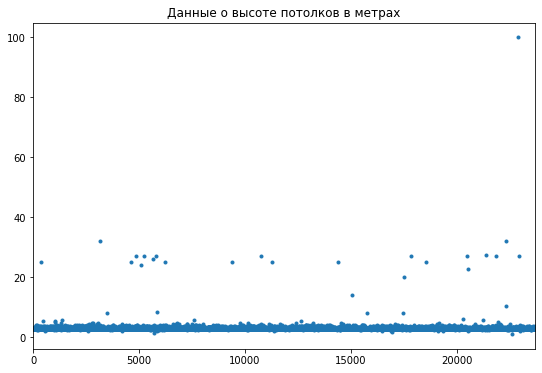

In [5]:
data['ceiling_height'].plot(style='.', title='Данные о высоте потолков в метрах')

Как видно из визуализации данных `ceiling_height`, основная часть значений сосредоточена в районе 2-3 метров.
Обычно не бывает квартир с высотой потолков меньше 2.40 м. Проверим это в нашей таблице.

In [6]:
data[data['ceiling_height'] < 2.40].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12.0,32.400000,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.500000,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.400000,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.900000,2,NaN,False,False,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,NaN,False,False,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,NaN,False,False,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12.0,15.000000,9,NaN,False,False,11.80,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,False,False,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.200000,12,NaN,False,False,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0


Высоту потолка 2.2м в 2-х этажном доме в селе Копорье хоть и с трудом, но можно допустить, а всё, что ниже не может быть правдой. С другой стороны, хорошо, что таких значений мало, около 15.

Теперь посмотрим внимательнее на строки, где высота потолков неправдоподобно большая.

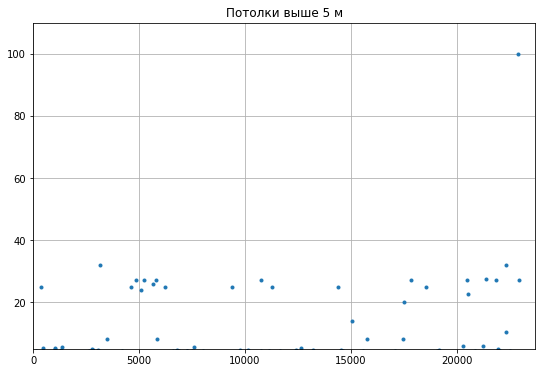

In [10]:
data['ceiling_height'].plot(style='.', title='Потолки выше 5 м', ylim=(5, 110), grid=True)

In [8]:
data[data['ceiling_height'] > 5].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,NaN,5,NaN,False,False,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.0,5,NaN,False,False,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,NaN,False,False,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,False,False,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0


В объявлениях, где высота потолков указана от 24 до 32 метров, почти наверняка просто ошибка в разрядности и нужно поделить высоту на 10

In [69]:
ceiling_height_filter_from24_to_32 = (
        (data['ceiling_height'] >= 24) &
        (data['ceiling_height'] <= 32))
data.loc[ceiling_height_filter_from24_to_32, 'ceiling_height'] /= 10

In [70]:
data.pivot_table(index='locality_name')

,last_price,total_area,ceiling_height,floors_total,floor,locality_name
464,66571000.0,280.3,5.2,8.0,7,Санкт-Петербург
1026,155000000.0,310.0,5.3,3.0,3,Санкт-Петербург
12628,3900000.0,50.0,5.3,5.0,5,Санкт-Петербург
7578,38000000.0,143.0,5.5,5.0,5,Санкт-Петербург
1388,59800000.0,399.0,5.6,6.0,6,Санкт-Петербург
21227,8200000.0,71.0,5.8,5.0,5,Санкт-Петербург
20264,119000000.0,187.6,6.0,7.0,7,Санкт-Петербург
3474,1400000.0,30.0,8.0,5.0,2,деревня Нурма
15743,5600000.0,67.0,8.0,16.0,1,Санкт-Петербург
17442,5350000.0,54.0,8.0,5.0,2,Красное Село


## Расчёты и добавление результатов в таблицу

## Исследовательский анализ данных

## Общий вывод

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод